# CMSC422 Final Project

By: Jonathan Gong, Andrew McNamara, John McAdoo

## Introduction

For our project, we will be evaluating the performance of different machine learning techniques on the process of predicting whether an email is spam or not. We will be using the dataset found [here](https://www.kaggle.com/datasets/somesh24/spambase) as the source of our information for training and testing. 

The techniques and models we included to inform our understanding of this task are as follows: Perceptron, Principal Component Analysis, Neural Networks, K-Nearest Neighbors, Decision Trees, Random Forest, Naive Bayes, and Logistic Regression. Not all of these techniques were used to obtain a realistic predictive model (i.e. Percpetron, and Principal Component Analysis in particular), as some were merely included to (a) demonstrate their relatively poor performance when compared to other algorithms more suited to the task and (b) inform our understanding of the dataset, such as whether or not the positive and negative labeled datapoints were linearly separable. 


## Motivation

Spam emails are a problem that affect nearly everyone. In fact, according to [DataProt.net](https://dataprot.net/), nearly 85% of all emails are spams. Knowing this, our initial interest in this topic was simply to better understand the nature of (and potentially identify the optimal solutions for) a very widespread problem. We were also interested in this topic due to its practical appeal as a binary-classification problem, in which each each example in the dataset can clearly be labeled as either one of two options: spam or non-spam. This characteristic of our dataset made it easier to apply a variety of different algorithms while also maintaining a relatively high degree of complexity / relevance to our coursework this past semester. 

Lastly, although our primary motivation for this project was to determine which different machine-learning algorithms would perform the best in predicting whether an email was spam, we were also interested in the following questions:

<br>

1. What machine-learning algorithms would have the greatest precision? After all, accurately predicting an email as spam is not the only relevant consideration for solving this problem; it is also important that the model not create false positives, as labeling a non-spam email as spam (and therefore potentially removing it from someone's inbox) is a significant issue no one would likes to endure. 

2. What features of the dataset are the most relevant in indicating that an email is spam? For instance, are there are any particular words, characters, or sequences of letters/phrases that are highly prevalent across a variety of spam emails? 



## About the Dataset

This dataset collects emails from a variety of different sources of spam, including "advertisements for products/websites, make money fast schemes, chain letters, pornography, and more." The collection of emails labeled as non-spam come from "filed work and personal e-mails." The dimensions of the dataset are 4601 X 57, meaning that there are 4601 emails total described by 57 different attributes characterizing each email. 

The features included in the data largely contains information regarding how frequently a word or character occured in the email. The data can generally be understood through the following descriptions (quoted directly from the data description on Kaggle):

1. Any column name matching the format "word_freq_WORD" is intended to mean: "the percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A 'word' in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string." There are about 48 of theses types of variables with a domain of [0, 100] -- it is highly likely that there were more than 48 total unique words in the corpus of emails included in the data, but we believe the authors of the dataset only included words that were non-trivial (either by virtue of their actual prevalance or by the abstract meaning of the word itself, such as the word "the"). The details surrounding this process are not clear to us.

2. Similarly, column names under the format "char_freq_CHAR" means " the percentage of characters in the email that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in email." This column also has a domain of [0, 100].

The rest of the columns (except #6) have a continuous domain of [1, infinity) 

3. A column indicating "the average length of uninterrupted sequences of capital letters." 

4. A coluumn indicating "the length of the longest uninterrupted sequence of capital letters." 

5. A column indicating "the total number of capital letters in the email."

6. The class label, with (1) indicating that the email is spam and (0) for non-spam.

In [21]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration

In [4]:
# Reading in the dataset
df = pd.read_csv('spambase_csv.csv')

In [5]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1a. Displaying the column names and their datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### 1b. Summary Statistics

In [3]:
display(df.describe())

NameError: name 'df' is not defined

### 1c. Data Correlation

In [10]:
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


## Data Exploration

### Splitting the Data into Test and Training Datasets

In [23]:
X = df.loc[:, df.columns != 'class']
Y = df[['class']]

In [24]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 1239)

In [25]:
print("Shape of Original Data is {}".format(df.shape))
print("Shape of Training Data is X: {} and Y: {}".format(train_x.shape, train_y.shape))
print("Shape of Test Data is X: {} and Y: {}".format(test_x.shape, test_y.shape))

Shape of Original Data is (4601, 58)
Shape of Training Data is X: (3680, 57) and Y: (3680, 1)
Shape of Test Data is X: (921, 57) and Y: (921, 1)


### Is the data linearly separable?

Considering the fact that we are trying to perform binary classification on this data, it makes sense to check if the data is linearly separable. We can do this by training a Perceptron. Since a perceptron is guaranteed to converge if the data is linearly separable, we will see if we can get 100% accuracy using this Perceptron. If we don't, that means the data is not linearly separable.

In [26]:
from sklearn.linear_model import Perceptron
spam_perceptron = Perceptron(max_iter=1000, random_state=0, fit_intercept=True, eta0=0.05)
spam_perceptron.fit(X,np.ravel(Y))

y_pred = spam_perceptron.predict(X)
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5931319278417735
Precision: 0.49192886456908347
Recall: 0.9917264202978489


We can see that we did not end up with 100% accuracy, leading us to conclude the data is not linearly separable. We also got poor accuracy and precision scores on our data, so the perceptron is not a good model for predicting for spam email.

### Principal Component Analysis

To get a better idea of how the data separates, we will do PCA to get the two highest eigenvectors of variance and see our data looks when projected onto these vectors. We can see that taking the first two principal components explains 0.99806998 of the variance, so looking at this graph does a good job of illuminating how the data separates. Spam emails were represented with red and legitimate emails were represented with blue. As we an see from the overlap, this is not linearly separable, and it makes sense that the perceptron functioned so poorly.

We can also get a better sense of how the data is spread. Most legitimate emails are clustered towards the bottom of this graph. Many spam emails are clearly distinguishable, as they are far above the legitimate ones here and clearly distinct. However, many spam emails are right in the cluster with the legitimate emails on the bottom. This indicated that techniques reliant on separating the data such as SVM or perceptrons won't function well on this data.

[0.92702701 0.07104297]


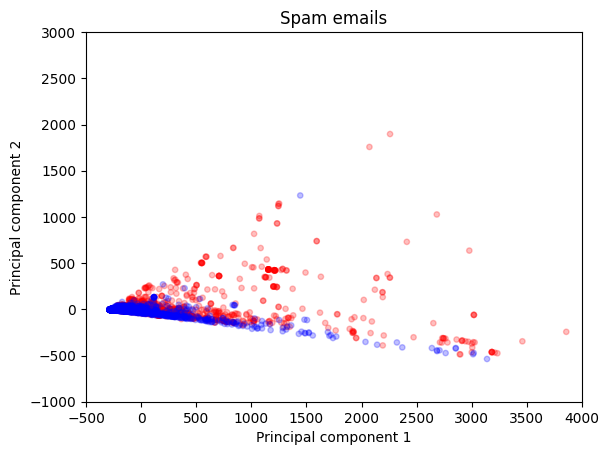

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(X)
principal_components=principal_components.T
colors = []
for y in Y["class"]:
    if y ==1:
        colors.append("red")
    else:
        colors.append("blue")
plt.scatter(principal_components[0],principal_components[1],c=colors,alpha = .25,s=15)
plt.xlim([-500,4000])
plt.ylim([-1000,3000])
plt.title("Spam emails")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show
plt.savefig('PCASpam.pdf')

## Running the Different Models

### 1. Neural Networks

We trained a neural network on the data using relu and an adaptive learning rate which got us 85 percent accuracy and precision. This is quite good, as it classifies 85% of email correctly and only 15% of emails flagged shouldn't have been.

In [28]:
from sklearn.neural_network import MLPClassifier
spam_nn = MLPClassifier(solver='sgd',activation='relu', alpha=1e-4,learning_rate='adaptive', hidden_layer_sizes=(30,15, 7), random_state=1,max_iter=400)
spam_nn.fit(train_x,np.ravel(train_y))
y_pred = spam_nn.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8588490770901195
Precision: 0.8544303797468354
Recall: 0.7627118644067796


### 2. K-Nearest Neighbors 

Steps (loosely) followed from this website: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

We were interested in applying K-Nearest Neighbors because it seemed logical to assume that spam-emails would exhibit a high degree of similarity in their feature values. Additionally, since all our features were numerical in nature it was natural that we test whether the emails with the smallest euclidean distance towards each other would be a good predictor of their respective class labels, as we would not have to do any reconstruction of the data to convert categorical labels into V-many binary indicator features. 

### Determining what k-value to use using cross-validation

In order to determine what k-value to use, we decided to implement cross-validation. This process essentially runs a KNN classifier for different variations of the data (in this case I used a parameter of cv = 5, so it was a 4:1 split between training and test data that was different for each k-value) for different values of K. I then plotted the accuracy score of each k-value to visually determine which k-value yielded the most success in predicting spam emails

In [31]:
k_values = [i for i in range(1, 20)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, np.ravel(Y), cv = 5)
    scores.append(np.mean(score))

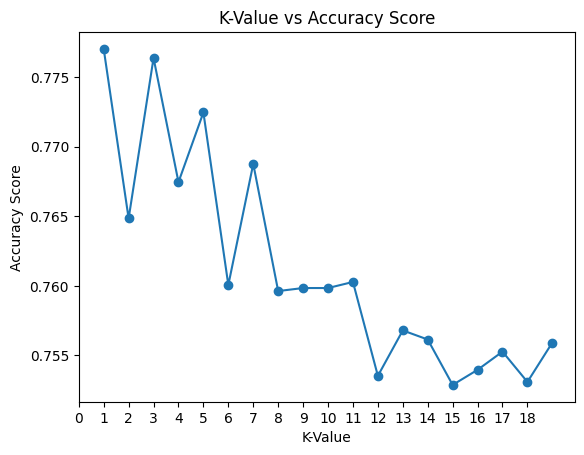

In [32]:
plt.title("K-Value vs Accuracy Score")
plt.xlabel("K-Value")
plt.ylabel("Accuracy Score")
plt.plot(k_values, scores, marker = 'o')
plt.xticks(np.arange(0, len(k_values), 1.0))
plt.show()

### b. Training the Model using the Best K based on Accuracy Score

The k-value that yielded the highest accuracy score was k = 1, so the first model which we will run the K-Nearest Neighbors algorithm for will have a hyperparameter of k = 1.

In [35]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(train_x, np.ravel(train_y))

KNeighborsClassifier(n_neighbors=1)

### c. Looking at the accuracy, precision, and recall of the best-K model

Source: https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021

TP = True Positives <br>
FP = False Positives<br>

Accuracy = the number of correct predictions / the total number of predictions made.<br>


Precision = (TP) / (TP + FP)

Recall = (TP) / (TP + FN) 

As evident in the results below, the KNN model with a K-value equal to 1 had about an 81% rate of accuracy, meaning that it made the correct prediction about 81% of the time. However, the precision for this model did not perform as well, exhibiting only a ~ 76% precision rate. This can be interpreted as meaning that the when the model did predict that an email was positive, it was only correct about 75% of the time. Recalling back our #2 consideration in our motivation (valuing a high degree of precision), this was a relatively poor outcome. Overall, the KNN algorithm performed satisfactorily but definitely did not seem like it was the best option for the task.

In [36]:
y_pred = knn.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8121606948968513
Precision: 0.7578347578347578
Recall: 0.751412429378531


### Naive Bayes

We thought to train a naive bayes on the data since it gives us a likelihood of an email being spam as opposed to just a binary classification. This allows for a spam email filter to definitively filter out the most likely to be spam, and flag less likely emails for manual review by the user to avoid throwing out legitimate emails. We can see that the naive bayes performs about en par with the K Nearest Neighbors algorithm and the neural network, but not as well as the decision tree or random forest. We used a Bernoulli Naive Bayes since each email can be thought of as a yes or no experiment, which is what the Bernoulli distribution is. For further explanation about Naive Bayes, read [here](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c).



In [37]:
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB()
bayes.fit(train_x,np.ravel(train_y))
y_pred = bayes.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
probs = bayes.predict_proba(test_x)
confident = []
for x in probs:
    if x[1] > .8:
        confident.append(1)
    else:
        confident.append(0)
y_pred = confident
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8751357220412594
Precision: 0.8610271903323263
Recall: 0.8050847457627118
Accuracy: 0.8707926167209555
Precision: 0.8903654485049833
Recall: 0.7570621468926554


### Logistic Regression

Since logistic regression is another algorithm that categorizes data according to probabilities, it offers the same benefits as Naive Bayes of giving different priority to different probabilities in classifications. We can see that logistic regression performed a bit better than Naive Bayes and the Neural network, although not quite as well as the Decision Tree and Random Forest. We can also observe that when we adjust the probability threshold for classifying as spam, we can raise precision, thus reducing the chance of false positives

In [39]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter=1500)
regression.fit(train_x,np.ravel(train_y))
y_pred = regression.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

probs = regression.predict_proba(test_x)
confident = []
for x in probs:
    if x[1] > .8:
        confident.append(1)
    else:
        confident.append(0)
        
y_pred = confident
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9283387622149837
Precision: 0.9210526315789473
Recall: 0.8898305084745762
Accuracy: 0.8816503800217155
Precision: 0.9487179487179487
Recall: 0.731638418079096


### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier

Depth 10
Accuracy: 0.9218241042345277
Precision: 0.8960674157303371
Recall: 0.9011299435028248
Top 5 Best Split Features:
char_freq_%24
word_freq_remove
char_freq_%21
word_freq_hp
capital_run_length_total


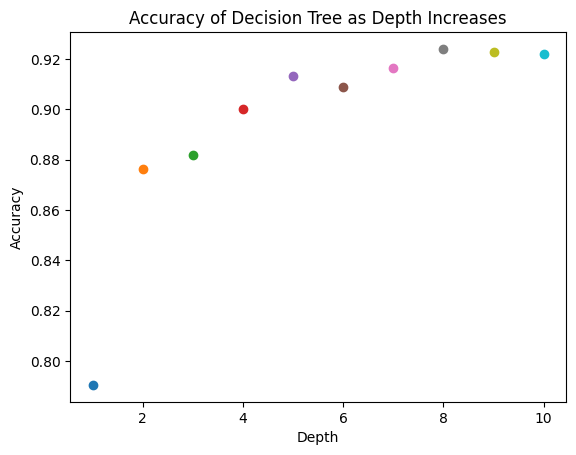

In [44]:
plt.title("Accuracy of Decision Tree as Depth Increases")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

num_iterations = 10

for i in range(num_iterations): 
    # Create the decision tree classifier
    clf = DecisionTreeClassifier(max_depth = i+1)

    # Train Decision Tree Classifer
    clf = clf.fit(train_x, train_y)

    #Predict the response for test dataset
    y_pred = clf.predict(test_x)

    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
    
    plt.scatter(i+1,accuracy)
    
    # Extract the feature importances
    importance_scores = clf.feature_importances_

    # Find the indices of the top 5 best split features
    top_5_i = importance_scores.argsort()[-5:][::-1]

    # Find the names of the top 5 best split features
    top_5_feat = X.columns[top_5_i]

    if i == 9:
        
        print("Depth", i+1)
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        
        # Print the top 5 best split features
        print("Top 5 Best Split Features:")
        for feat in top_5_feat:
            print(feat)
        
        
plt.show()

### Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

Depth 10
Accuracy: 0.9348534201954397
Precision: 0.9427710843373494
Recall: 0.884180790960452
Top 5 Best Split Features:
char_freq_%24
char_freq_%21
word_freq_remove
capital_run_length_average
word_freq_your


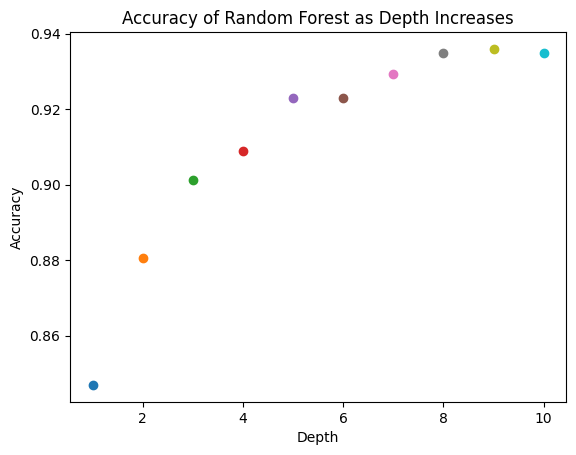

In [50]:
plt.title("Accuracy of Random Forest as Depth Increases")
plt.xlabel("Depth")

plt.ylabel("Accuracy")
num_iterations = 10
for i in range(num_iterations):
   
    # Create RandomForest classifer object with max depth i+1 and 100 DTs
    rfc = RandomForestClassifier(n_estimators=100, max_depth=i+1)

    # Train Random Forest Classifer
    rfc = rfc.fit(train_x, np.ravel(train_y))

    #Predict the response for test dataset
    y_pred = rfc.predict(test_x)
    
    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
   
    plt.scatter(i+1,accuracy)
    
    # Extract the feature importances
    importance_scores = rfc.feature_importances_

    # Find the indices of the top 5 best split features
    top_5_indices = importance_scores.argsort()[-5:][::-1]

    # Find the names of the top 5 best split features
    top_5_features = X.columns[top_5_indices]

    # Print the top 5 best split features
    if i == 9:
        print("Depth", i+1)
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print("Top 5 Best Split Features:")
        for feature in top_5_features:
            print(feature)
            
plt.show()